PCA for visualization

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

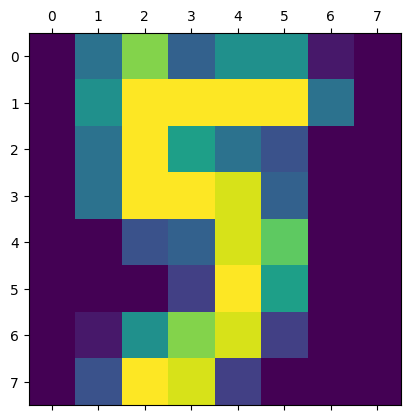

In [6]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[33])
plt.show()

In [7]:
digits.target[33]

5

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits =  pca.fit_transform(digits.data)

In [12]:
new_digits.shape

(1797, 2)

In [13]:
digits.data.shape

(1797, 64)

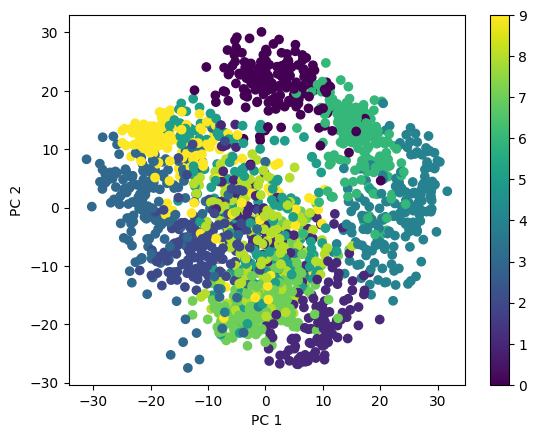

In [16]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0], new_digits[:,1], c=digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

PCA for speedup models

In [17]:
from sklearn.datasets import load_digits
import numpy as np

In [18]:
digits = load_digits()

In [19]:
digits.data.shape

(1797, 64)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [29]:
new_data_pca.shape

(1797, 10)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [31]:
x_train.shape

(1437, 10)

In [32]:
x_test.shape

(360, 10)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

import time
start = time.time()
model.fit(x_train, y_train)
end = time.time()

print((end - start)*1000)

23.818254470825195


In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8972222222222223